In [41]:
import torch
import matplotlib.pyplot as plt
from mf import MF

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Preparing the Test data

In [42]:
from torch.utils.data import DataLoader, TensorDataset, random_split
import pandas as pd

# URL for MovieLens 100k dataset (you can change the URL for other versions)
url = 'https://files.grouplens.org/datasets/movielens/ml-100k/u.data'

# Load the dataset directly into a pandas DataFrame
df = pd.read_csv(url, sep='\t', header=None, names=['user_id', 'item_id', 'rating', 'timestamp'])

print(df.head())

   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596


## Mapping the value

In [43]:
# Take the unique value and mapping it
user_mapping = {user_id: idx for idx, user_id in enumerate(df['user_id'].unique())} 
item_mapping = {item_id: idx for idx, item_id in enumerate(df['item_id'].unique())}

# Applying the mappings
df['user_id'] = df['user_id'].map(user_mapping)
df['item_id'] = df['item_id'].map(item_mapping)

print(df.head())

   user_id  item_id  rating  timestamp
0        0        0       3  881250949
1        1        1       3  891717742
2        2        2       1  878887116
3        3        3       2  880606923
4        4        4       1  886397596


## Split the data

In [44]:

# Convert from DataFrame into PyTorch tensor
user_tensor = torch.tensor(df['user_id'].values,dtype=torch.long)
item_tensor = torch.tensor(df['item_id'].values,dtype=torch.long)
rating_tensor = torch.tensor(df['rating'].values,dtype=torch.float)

# Create a dataset
dataset = TensorDataset(user_tensor, item_tensor, rating_tensor)

# Split the dataset into 70% training, 15% validation, and 15% test
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_data, val_data, test_data = random_split(dataset, [train_size, val_size, test_size])

# Create a dataLoader for training, validation, and testing
batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

## Training

In [45]:
model = MF(num_users=len(user_mapping)
           , num_items= len(item_mapping)
           , num_factors=30
           , device=device)

model.to(device)

train_losses, val_losses = model.train_model(train_loader, val_loader,
                                         num_epochs=25,lr=0.002, reg=1e-5)


Epoch 1/25, Train Loss: 5.0233, Time: 3.39s
Epoch 2/25, Train Loss: 1.0127, Time: 3.87s
Epoch 3/25, Train Loss: 0.9294, Time: 4.09s
Epoch 4/25, Train Loss: 0.9024, Time: 3.97s
Epoch 5/25, Train Loss: 0.8696, Time: 4.00s
Epoch 6/25, Train Loss: 0.8248, Time: 4.28s
Epoch 7/25, Train Loss: 0.7731, Time: 4.41s
Epoch 8/25, Train Loss: 0.7180, Time: 4.13s
Epoch 9/25, Train Loss: 0.6580, Time: 4.10s
Epoch 10/25, Train Loss: 0.5981, Time: 4.35s
Epoch 11/25, Train Loss: 0.5015, Time: 4.75s
Epoch 12/25, Train Loss: 0.4833, Time: 3.96s
Epoch 13/25, Train Loss: 0.4739, Time: 4.46s
Epoch 14/25, Train Loss: 0.4665, Time: 4.76s
Epoch 15/25, Train Loss: 0.4597, Time: 4.19s
Epoch 16/25, Train Loss: 0.4532, Time: 4.10s
Epoch 17/25, Train Loss: 0.4468, Time: 4.43s
Epoch 18/25, Train Loss: 0.4405, Time: 4.81s
Epoch 19/25, Train Loss: 0.4343, Time: 5.38s
Epoch 20/25, Train Loss: 0.4282, Time: 4.68s
Epoch 21/25, Train Loss: 0.4157, Time: 4.26s
Epoch 22/25, Train Loss: 0.4150, Time: 4.43s
Epoch 23/25, Train 

## Plot the Loss function

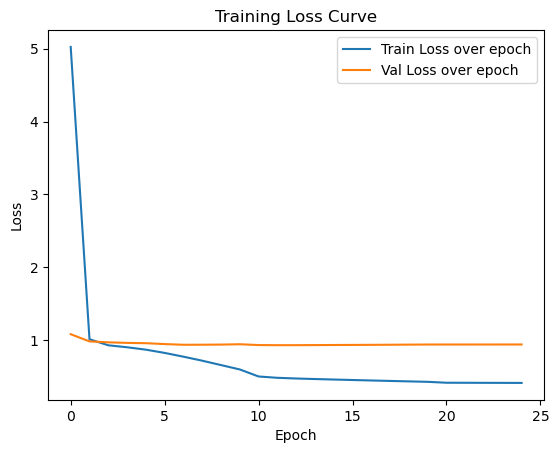

In [46]:
plt.plot( train_losses, label="Train Loss over epoch")
plt.plot( val_losses, label = "Val Loss over epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.show()

## Compute the test loss

In [47]:
print("Test Loss: ",model.evaluate(test_loader=test_loader))

Test Loss:  0.9547606504794693
